In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
%matplotlib inline
from importlib import reload
%cd ../

import DeepReinforcementLearning.DQNLearner as drl
import plots.reward_progress_plots as rpp
reload(drl)
reload(rpp)

/home/strnad/PIK/pyDRLinWESM


/home/strnad/anaconda3/envs/tf1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/strnad/anaconda3/envs/tf1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/strnad/anaconda3/envs/tf1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/strnad/anaconda3/envs/tf1/lib/python3.7/site-pack

<module 'plots.reward_progress_plots' from '/home/strnad/PIK/pyDRLinWESM/plots/reward_progress_plots.py'>

### Define the environment you want to use 


In [2]:
# Here we decide to use the AYS environment. 
# This environment requires the pyviability package of Tim Kittel (https://timkittel.github.io/PyViability/)
import AYS.AYS_Environment as ays
reload(ays)
    
dt=1
max_steps=600 # in environment otherwise fix point is reached
reward_type='PB'# might be as well 'survive'

learning_analysis_folder='AYS'
observables=dict(A=True,
                 Y=True,
                 S=True,
        )

## Set up simulation for learning

In [3]:
episodes=7000  # total number of learning episodes
episode_steps=100  # analysis steps of learning behavior
noise_strength=0.00

# DRL Hyperparameters
batch_size = 64     # Number of experiences the Batch replay can keep
network_learning_rate= 0.00025
gamma=0.96
Boltzmann_prob=False
memory_size = int(1e5)  # for larger environments might be nessesary to be set larger 

# Specifiy the DRL learner
prior_exp_replay=True
importance_sampling=True
noisy_net=False
learner_type='ddqn'# might be also 'dqn','fdqn','c51'
dueling_networks=True

# parameters for the agent
Update_target_frequency=100
explore_start = 1.0 
explore_stop = 0.01 
decay_rate=0.001 
drl_learner=learner_type

if prior_exp_replay:
    drl_learner+='_per'
if importance_sampling:
    drl_learner+='_is'
if dueling_networks:
    drl_learner+='_duel'        

In [4]:
reload(drl)
reload(ays)
full_observables=dict( A=True, Y=True, S=True  )
my_Env=ays.AYS_Environment(dt=dt, reward_type=reward_type)
dirpath='./AYS/'
plot_progress=True

dqn_agent=drl.DQNLearner(my_Env=my_Env, dt=dt,  episodes=episode_steps, max_steps=max_steps, 
                         gamma=gamma, explore_start = explore_start  , explore_stop = explore_stop,  decay_rate=decay_rate , Boltzmann_prob=Boltzmann_prob,
                         reward_type=reward_type, Update_target_frequency=Update_target_frequency,
                         learner_type=learner_type, prior_exp_replay=prior_exp_replay, dueling=dueling_networks, importance_sampling=importance_sampling, 
                         noisy_net=noisy_net, memory_size = memory_size, batch_size = batch_size , network_learning_rate=network_learning_rate, 
                         plot_progress=plot_progress, dirpath=dirpath, learning_analysis_folder='AYS')



Init AYS Environment! 
Reward Type: PB 
Sustainability Boundaries [A_PB, Y_SF, S_ren]:  [3.45e+02 4.00e+13 0.00e+00]
current directory is : ./AYS/
Learner: Store results in:./AYS//ddqn_per_is_duel/epsilon_greedy/PB
Using the following environment: <class 'AYS.AYS_Environment.AYS_Environment'>
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Created Dueling Networks!


## Start the run

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

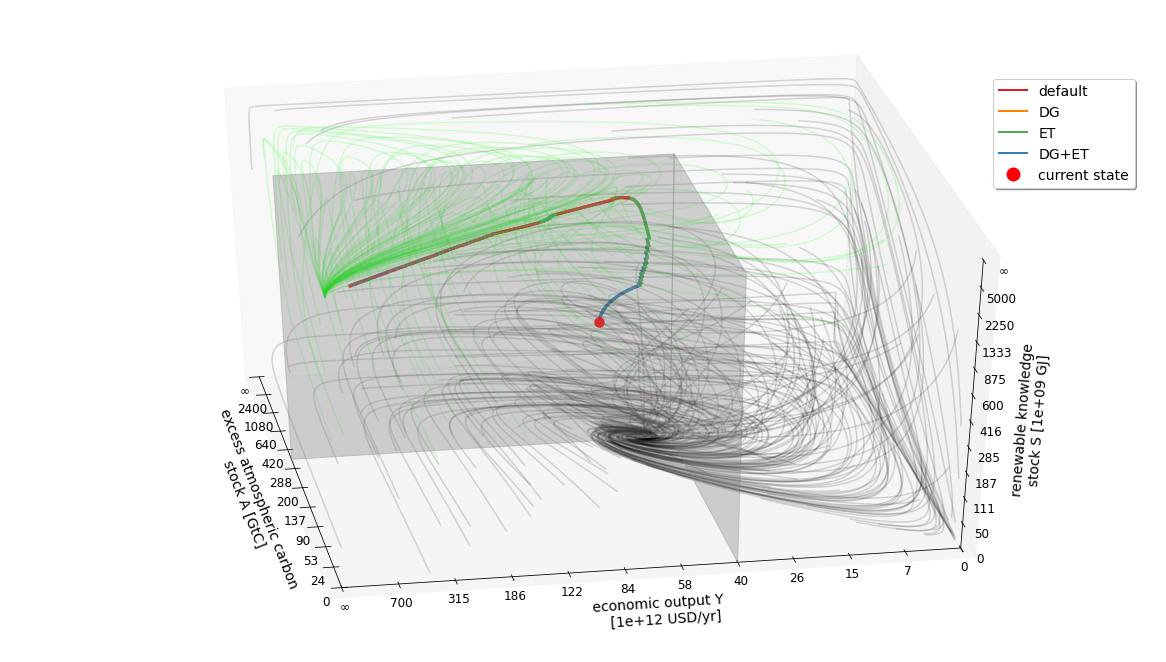

Saved :./AYS//ddqn_per_is_duel/epsilon_greedy/PB/DQN_Path/GREEN_FP/0_path_[0.5, 0.5, 0.5]_episode6300.txt
63


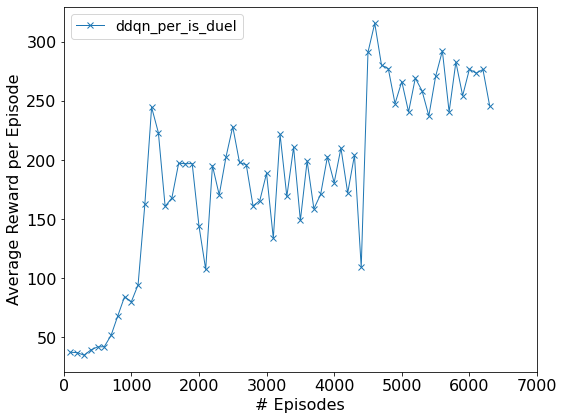

episode:  6300


In [ ]:
results_path=dqn_agent.results_path
num_runs= int(episodes/episode_steps) + 1

# Reset and initialize memory of agent
dqn_agent.reset_learner(run_number=0)
    
for run in range(num_runs ):
    # Here we train the agent with runs times episodes, we do this after evaluation to get the performance of the untrained agent as well.
    dqn_agent.learn()    
    
    # Visualize learning results
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    # Test the agents behavior 
    result=dqn_agent.test_on_current_state(save_plot=True, show_plot=True)  # save_plot=True if we Trajectory of test should be stored!
    rpp.plot_one_learning_developement(path='./', model='AYS',learner_type=drl_learner, reward_type=reward_type,label=drl_learner )
    
    
# Evaluate Final results:
print(dqn_agent.test_on_current_state(save_plot=True, show_plot=True))

print("Episodes Learning: Stored results into " + resugflts_path)

